In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

In [4]:
df=pd.read_csv(r'F:\Deep Learning Assignments\Assignment-4\Multiple CSV\5.outlier.csv',header=None)

In [5]:
df.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]

<Axes: xlabel='0', ylabel='1'>

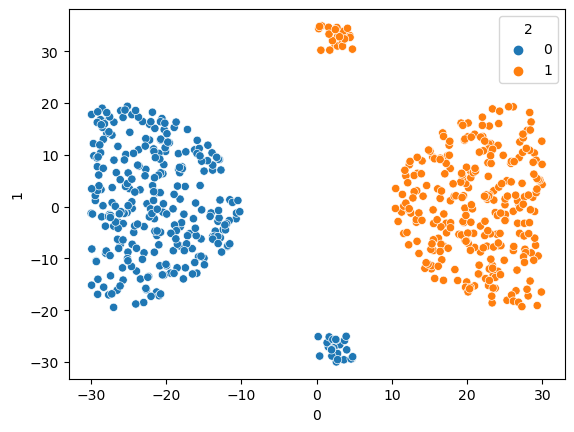

In [7]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [9]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [22]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.009),bias_regularizer=L2(0.003),input_dim=2))
model.add(Dense(5,activation="tanh",kernel_regularizer=L2(0.009),bias_regularizer=L2(0.003)))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.009),bias_regularizer=L2(0.003)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.009),bias_regularizer=L2(0.003)))

In [23]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
98/98 [==============================] - 3s 14ms/step - loss: 0.8335 - accuracy: 0.5617 - val_loss: 0.5955 - val_accuracy: 1.0000
Epoch 2/20
98/98 [==============================] - 1s 10ms/step - loss: 0.4874 - accuracy: 1.0000 - val_loss: 0.4102 - val_accuracy: 1.0000
Epoch 3/20
98/98 [==============================] - 1s 11ms/step - loss: 0.3625 - accuracy: 1.0000 - val_loss: 0.3303 - val_accuracy: 1.0000
Epoch 4/20
98/98 [==============================] - 1s 11ms/step - loss: 0.3037 - accuracy: 1.0000 - val_loss: 0.2887 - val_accuracy: 1.0000
Epoch 5/20
98/98 [==============================] - 1s 11ms/step - loss: 0.2722 - accuracy: 1.0000 - val_loss: 0.2644 - val_accuracy: 1.0000
Epoch 6/20
98/98 [==============================] - 1s 10ms/step - loss: 0.2529 - accuracy: 1.0000 - val_loss: 0.2486 - val_accuracy: 1.0000
Epoch 7/20
98/98 [==============================] - 1s 11ms/step - loss: 0.2402 - accuracy: 1.0000 - val_loss: 0.2376 - val_accuracy: 1.0000
Epoch 8/20
98

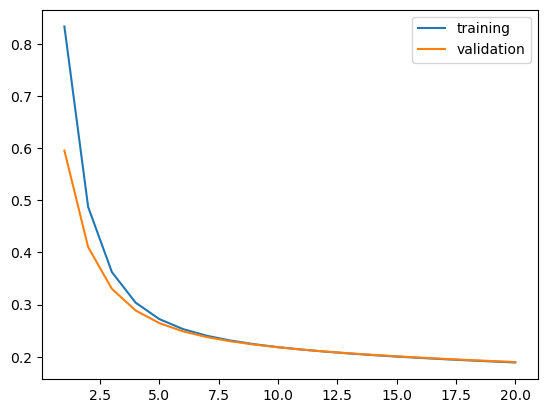

In [24]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 48s 5ms/step


<Axes: >

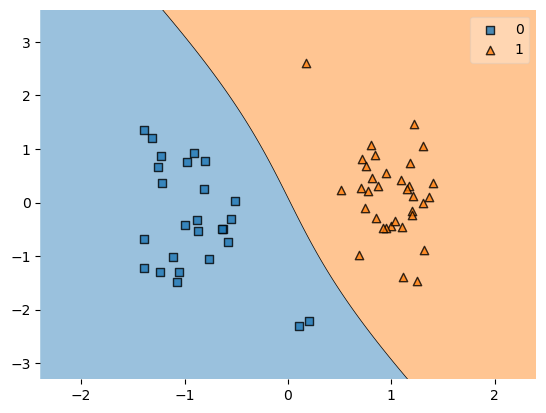

In [25]:
plot_decision_regions(x_testp,y_test.values,clf=model)